In [1]:
import os
import numpy as np
import pandas as pd    
import seaborn as sns  
import matplotlib.pyplot as plt 
import plotly.express as px

In [2]:
pwd = os.getcwd()
filepath = os.path.join(pwd,"supermarket_sales.csv")
filepath

'c:\\Users\\Ernest\\Desktop\\Python\\Sales Analysis\\supermarket_sales.csv'

In [3]:
sales_data = pd.read_csv(filepath)
sales_data

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
#Unifying naming conventions to all lower characters:
sales_data.columns = sales_data.columns.str.lower()
sales_data.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax 5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'rating'],
      dtype='object')

In [5]:
sales_data.shape

(1000, 17)

In [6]:
# Getting a quick look into the dataset 
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax 5%                   1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [7]:
#Checking the statistical measures of the numerical variables in the dataset
sales_data.describe() 

,unit_price,quantity,tax 5%,total,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [8]:
#checking for null values
sales_data.isnull().sum()

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax 5%                     0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64

In [9]:
sales_data.city.value_counts()

city
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [10]:
sales_data.groupby('city')['gross_income'].agg([np.mean,np.median])

,mean,median
city,,
Mandalay,15.232024,12.04200
Naypyitaw,16.052367,12.92475
Yangon,14.874001,11.46800


In [11]:
#Total count of customer type
fig = px.histogram(sales_data, x = 'customer_type',color='gender',barmode='group',title='Total Count of Customer type')
fig

In [21]:
sales_data.branch.value_counts()

branch
A    340
B    332
C    328
Name: count, dtype: int64

In [12]:
#Total count of Branches
fig = px.histogram(sales_data, x = 'branch',color='gender',barmode='group',title='Total count of Branches')
fig

<Axes: ylabel='payment'>

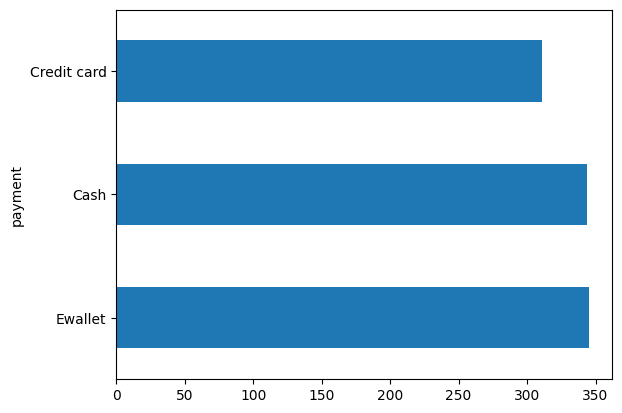

In [13]:
sales_data.payment.value_counts().plot(kind='barh')

 **Customers seem to prefer Ewallet and cash payments rather as opposed to using credit cards** 

* A possible reason might be :

*Some people prefer to pay for purchases with cash or debit cards. This helps to eliminate the risk of debt and simplifies budgeting. In addition, using cash instead of credit cards allows people to stay on budget (using the envelope budgeting system), and to keep a close eye on expenditures*


<Figure size 1200x700 with 0 Axes>

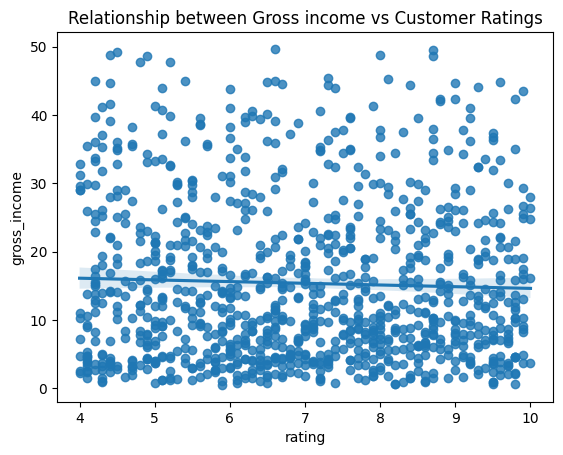

<Figure size 1200x700 with 0 Axes>

In [14]:
#Reviewing  the relationships between dependent and independent Variables
x=sales_data["rating"]
y=sales_data["gross_income"]
sns.regplot(x=sales_data["rating"],y=sales_data["gross_income"])
plt.title('Relationship between Gross income vs Customer Ratings')
plt.figure(figsize=(12, 7))

* *There seems to be no relationship between Gross income and Customer ratings*

<Axes: title={'center': 'Total Monthly transaction by Gender'}, xlabel='product_line', ylabel='count'>

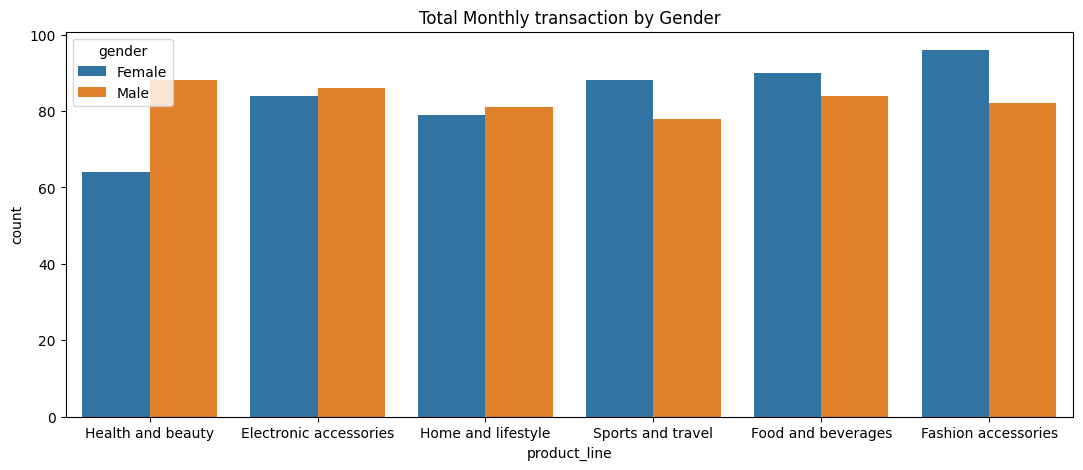

In [15]:
# Checking the spending pattern of females and males and in which category do they spend a lot?
plt.figure(figsize=(13, 5))
plt.title('Total Monthly transaction by Gender')
sns.countplot(x=sales_data.product_line, hue = sales_data.gender)

In [16]:
#Change in Total Price of Country With regards to DATE
px.bar(sales_data,x='city', y='total', color='city', animation_frame='date', title='Change in the Total price of Country With regards to DATE', animation_group="branch", range_y=[0,1000])

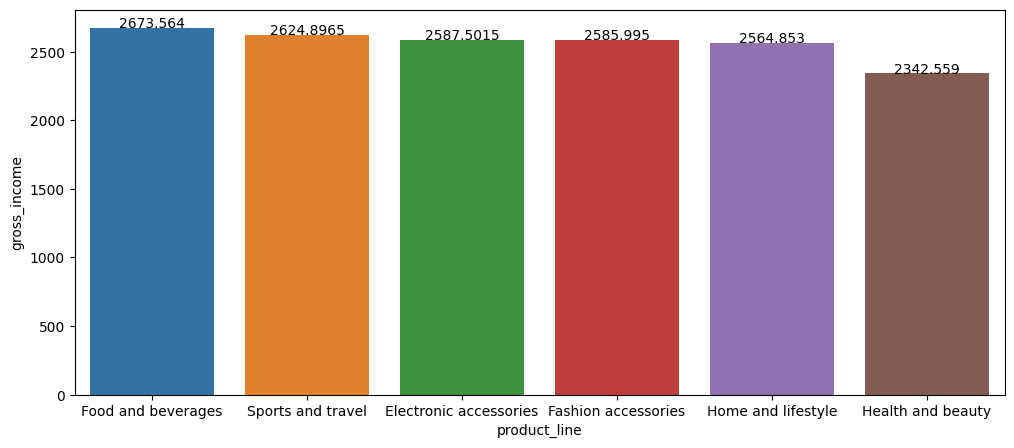

In [17]:
#Products generating most income
dat=sales_data[["product_line", "gross_income"]].groupby(['product_line'], as_index=False).sum().sort_values(by='gross_income', ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(x='product_line', y='gross_income', data=dat)
for i, v in enumerate(dat.gross_income):
    plt.text(i,v,str(v),ha='center')

## Strategic Decision-Making

Based on the analysis of the significant difference in sales between product lines, here are some strategic decision-making options that can be considered:

1. Resource allocation: Allocate more resources, such as budget, manpower, and marketing efforts, to the product line with higher sales. This decision ensures that the successful product line receives the necessary support to maintain and potentially further increase its market share.

2. Product portfolio optimization: Evaluate the underperforming product lines and assess their viability. Consider whether any adjustments can be made to improve their sales performance or if it would be more strategic to discontinue or divest those lines. This decision allows for a more streamlined and focused product portfolio, concentrating resources on the most profitable and high-potential products.

3. Market expansion: Explore opportunities to expand the successful product line into new markets or customer segments. Analyze whether the success of the product line in its current market can be replicated in other regions or target audiences. This decision can help diversify the customer base and reduce reliance on a single market or segment.

4. Product line diversification: Evaluate the potential for diversifying the underperforming product lines by introducing new features, variants, or complementary products. This decision allows for expanding the product offerings and tapping into different customer needs and preferences.

5. Competitive analysis: Conduct a thorough analysis of competitors' product lines to identify their strengths and weaknesses. Identify any gaps in the market that the underperforming product lines can fill with appropriate adjustments or enhancements. This decision helps position the product lines strategically against competitors and identify unique selling points.

6. Marketing and promotional strategies: Assess the marketing and promotional strategies employed for the successful product line and identify best practices that can be applied to the other lines. This decision involves tailoring marketing messages, channels, and campaigns to improve the visibility and appeal of the underperforming product lines.

7. Pricing and profitability analysis: Analyze the pricing structures and profit margins of each product line. Assess whether pricing adjustments can be made to improve the competitiveness and profitability of the underperforming lines. This decision involves considering pricing strategies such as bundling, discounts, or premium positioning based on the market dynamics and customer preferences.

8. Customer feedback and research: Gather customer feedback, conduct market research, and utilize data analytics to gain deeper insights into customer needs and preferences. This decision supports informed product development and marketing strategies that align with customer expectations and enhance the performance of all product lines.


<Figure size 1300x700 with 0 Axes>

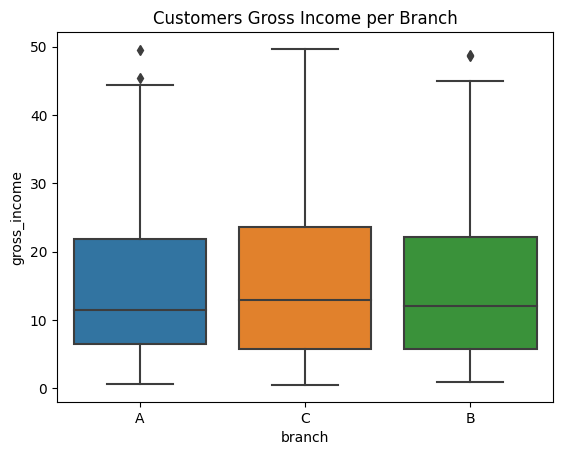

<Figure size 1300x700 with 0 Axes>

In [18]:
# Lets have a Quick peek at the variability of the data 
sns.boxplot(x=sales_data['branch'],y=sales_data['gross_income'])
plt.title('Customers Gross Income per Branch')
plt.figure(figsize=(13, 7))

* *On average, there is little variation in gross income among the branches, with Branch C standing out slightly due to higher income compared to Branch A and B. Interestingly, despite Branch A having slightly higher sales, it is Branch C, located in Naypyitaw, that emerges as the most profitable branch in terms of gross income, confirming previous observations*

In [19]:
numerical_data = sales_data.select_dtypes(include=[np.number])
numerical_data

,unit_price,quantity,tax 5%,total,cogs,gross_margin_percentage,gross_income,rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [20]:
categorical_data = sales_data.select_dtypes(exclude=[np.number])
categorical_data 

,invoice_id,branch,city,customer_type,gender,product_line,date,time,payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,01/05/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,03/08/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,03/03/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,02/08/2019,10:37,Ewallet
...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,13:46,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,03/02/2019,17:16,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,02/09/2019,13:22,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,2/22/2019,15:33,Cash
